In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import pandas as pd
import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorozcoceron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorozcoceron/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import os 

In [4]:
path = "/Users/lorozcoceron/Proyecto_integrador_MSc/texts/"

In [5]:
filenames = os.listdir(path)

In [6]:
filenames[:5]

['2020-4330-2019-PAS-TR1-MAI.txt',
 '2020-12969-50834-FQ-TR1-MAI.txt',
 '2020-4330-49958-FQ-TR1-MAI.txt',
 '12914-50286-FQ.txt',
 '13353-47649-ATR3 FASE N°1 CDBC FQ.txt']

In [7]:
tag = []
tag_original = pd.DataFrame(columns = ["document", "tag"])
for i in range(len(filenames)):
    tag_original.loc[i] = None
    if "-FQ" in filenames[i]:
        tag.append("Aceites")
    elif "-CR" in filenames[i]:
        tag.append("Gases")
    elif "-FU" in filenames[i]:
        tag.append("Furanos")
    else:
        tag.append("otros")

    tag_original["document"].loc[i] = filenames[i]
    tag_original["tag"].loc[i] = tag[i]

In [8]:
tag_original["tag"].value_counts()

otros      206
Aceites    200
Gases       98
Furanos      2
Name: tag, dtype: int64

In [9]:
tag_original

,document,tag
0,2020-4330-2019-PAS-TR1-MAI.txt,otros
1,2020-12969-50834-FQ-TR1-MAI.txt,Aceites
2,2020-4330-49958-FQ-TR1-MAI.txt,Aceites
3,12914-50286-FQ.txt,Aceites
4,13353-47649-ATR3 FASE N°1 CDBC FQ.txt,otros
...,...,...
501,2019-4854-44929-FQ-TR9-PAZ.txt,Aceites
502,12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDB...,Aceites
503,2019 - 4700048304 PCB.txt,otros
504,2019-12691-62132-CR-TR10-PAZ.txt,Gases


In [10]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return(f.read())
  
list_with_text = []
  
# iterate through all file
for filename in filenames:
    # Check whether file is in text format or not
    if filename.endswith(".txt"):
        file_path = f"{path}{filename}"
  
        # call read text file function
        str_file = read_text_file(file_path)
        list_with_text.append(str_file)

In [11]:
list_with_text[0]

' \n\nJORPA INGENIERÍA S.A. RL-39 V2019 R1\n\nServicios de Ingeniería 0) R p\nFonos: (2)29598900 — 29598913 Á A\nDresden N? 4688- 4672 — San Miguel — Santiago ANALISIS DE CONCENTRACIÓN DE J / A\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nCHILE ADITIVOS\n1/1\nEMPRESA: TRANSELEC S.A. FECHA: 26/02/2020\nOT: 6259 EQUIPO / DIAGNÓSTICO\nID. EQUIPO: Autotransformador TAG ATR-1 ABB NO 89391 4330 4330\nPOT. MÁXIMA: 90 MVA FECHA MUESTREO: 19/12/2019\nVOLTAJE: 220/110/13,2 kv FECHA RECEPCIÓN: 27/12/2019\nLUGAR: S/E Maitencillo FECHA ANÁLISIS: 03/02/2020\nDIAGNOSTICO ANTERIOR: — No tiene ANO FABRICACIÓN: 2005\nFECHA: No tiene PUNTO MUESTREO: — Nivel inferior estanque\nZ LIMITE ACEITE | LIMITE ACEITE EN\nPRUEBA UNIDAD METODO RESULTADO NUEVO SERVICIO\nAnálisis de contenido de o\ninhibidor BHT - DBPC %o ASTM D 2668 NR 0,08 a 0,40 >0,18\nAnálisis de contenido de BTA ppm Cigré WG A2.32 TF 02 <1 20a 45 >10\nAnálisis de contenido de o * *\nIrgamet 39 

In [12]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(list_with_text)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(list_with_text[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    document = unidecode.unidecode(document)
    
    documents.append(document)

In [13]:
documents[0]

'jorpa ingenieria a rl 39 v2019 r1 servicios de ingenieria 0 p fonos 2 29598900 29598913 a dresden 4688 4672 san miguel santiago analisis de concentracion de a chile aditivos 1 1 empresa transelec a fecha 26 02 2020 ot 6259 equipo diagnostico id equipo autotransformador tag atr 1 abb no 89391 4330 4330 pot maxima 90 mva fecha muestreo 19 12 2019 voltaje 220 110 13 2 kv fecha recepcion 27 12 2019 lugar e maitencillo fecha analisis 03 02 2020 diagnostico anterior no tiene ano fabricacion 2005 fecha no tiene punto muestreo nivel inferior estanque limite aceite limite aceite en prueba unidad metodo resultado nuevo servicio analisis de contenido de inhibidor bht dbpc astm 2668 nr 0 08 0 40 0 18 analisis de contenido de bta ppm cigre wg a2 32 tf 02 1 20a 45 10 analisis de contenido de irgamet 39 ppm cigre wg a2 32 tf 02 81 la concentracion de irgamet 39 recomendada para transformadores con presencia de dibencil disulfuro e 100 ppm el nombre comercial del pasivador metalico puede ser irgamet 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [15]:
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [17]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.06389952,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24088459, 0.        , 0.03512951, ..., 0.03588077, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
# Creando Target
key_words_aceites = ["temperatura aceite", "humedad", "rigidez dielectrica", "tension interfacial", "numero neutralizacion", "color"]

In [19]:
# Creando Target
key_words_gases = ["nitrogeno", "oxigeno", "dioxido de carbono", "metano", "etileno", "acetileno"]

In [20]:
key_words_furanos = ["hidroximetil", "furfuril", "metil", "polimerización", "furfural", "acetilfurfural"]

In [21]:
key_words = key_words_aceites + key_words_furanos + key_words_gases

In [22]:
doc_labels = pd.DataFrame(columns=key_words)

In [23]:
doc_labels["Nombre documento"] = None
doc_labels["Target"] = None


In [24]:
doc_labels

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Nombre documento,Target


In [25]:
for index_document in range(len(documents)):
    doc_labels.loc[index_document] = None
    doc = documents[index_document]
    doc_labels.loc[index_document]["Nombre documento"] = filenames[index_document]
    for key_word in key_words:
        doc_labels.loc[index_document][key_word] = 1 if key_word in doc else 0


In [26]:
doc_labels

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Nombre documento,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2020-4330-2019-PAS-TR1-MAI.txt,NaN
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12969-50834-FQ-TR1-MAI.txt,NaN
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2020-4330-49958-FQ-TR1-MAI.txt,NaN
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,12914-50286-FQ.txt,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13353-47649-ATR3 FASE N°1 CDBC FQ.txt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-4854-44929-FQ-TR9-PAZ.txt,NaN
502,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDB...,NaN
503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019 - 4700048304 PCB.txt,NaN
504,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2019-12691-62132-CR-TR10-PAZ.txt,NaN


In [27]:
for i in range(len(doc_labels)):
    if doc_labels[key_words_aceites].sum(axis=1).loc[i]>2:
        doc_labels.loc[i]["Target"] = "Aceites"
    elif doc_labels[key_words_gases].sum(axis=1).loc[i]>2:
        doc_labels.loc[i]["Target"] = "Gases"
    elif doc_labels[key_words_furanos].sum(axis=1).loc[i]>2:
        doc_labels.loc[i]["Target"] = "Furanos"
    else:
        doc_labels.loc[i]["Target"] = "Otros"

In [28]:
doc_labels

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Nombre documento,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2020-4330-2019-PAS-TR1-MAI.txt,Otros
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12969-50834-FQ-TR1-MAI.txt,Aceites
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2020-4330-49958-FQ-TR1-MAI.txt,Aceites
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,12914-50286-FQ.txt,Aceites
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13353-47649-ATR3 FASE N°1 CDBC FQ.txt,Aceites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-4854-44929-FQ-TR9-PAZ.txt,Aceites
502,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDB...,Aceites
503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019 - 4700048304 PCB.txt,Otros
504,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2019-12691-62132-CR-TR10-PAZ.txt,Gases


In [29]:
doc_labels["Target"].value_counts()

Aceites    285
Gases      152
Otros       66
Furanos      3
Name: Target, dtype: int64

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [31]:
doc_labels.set_index("Nombre documento", inplace=True)

In [32]:
doc_labels.head()

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Target
Nombre documento,,,,,,,,,,,,,,,,,,,
2020-4330-2019-PAS-TR1-MAI.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Otros
2020-12969-50834-FQ-TR1-MAI.txt,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aceites
2020-4330-49958-FQ-TR1-MAI.txt,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Aceites
12914-50286-FQ.txt,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Aceites
13353-47649-ATR3 FASE N°1 CDBC FQ.txt,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aceites


In [33]:
docs_tag = pd.read_csv("Target - tagging.csv", sep=",")

In [36]:
docs_tag.set_index("document", inplace=True)
docs_tag

,real target,provider
document,,
01-2020 - 12914-48590-BCO- RESERVA FQ.txt,Aceites,Jorpa
01-2020 - 12914-62511-BCO- RESERVA CR.txt,Gases,Jorpa
01-2020 - 13242-48578-BCO-ATR1 FASE N°1 FQ.txt,Aceites,Jorpa
01-2020 - 13242-62505-BCO-ATR1 FASE N°1 CR.txt,Gases,Jorpa
01-2020 - 13242-62505-BCO-ATR1 FASE N°1 CR(1).txt,Gases,Jorpa
...,...,...
TR2-Agrupado 1.txt,Otros,Otros
TR2-Agrupado 2.txt,Otros,Otros
TR2_Pruebas Parte 1.txt,Otros,Otros


In [37]:
baseline_results = doc_labels.join(docs_tag)
baseline_results

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,...,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Target,real target,provider
Nombre documento,,,,,,,,,,,,,,,,,,,,,
2020-4330-2019-PAS-TR1-MAI.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,Otros,Otros,Jorpa
2020-12969-50834-FQ-TR1-MAI.txt,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Aceites,Aceites,Jorpa
2020-4330-49958-FQ-TR1-MAI.txt,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,Aceites,Aceites,Jorpa
12914-50286-FQ.txt,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,Aceites,Aceites,Jorpa
13353-47649-ATR3 FASE N°1 CDBC FQ.txt,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Aceites,Aceites,Jorpa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-4854-44929-FQ-TR9-PAZ.txt,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Aceites,Aceites,Jorpa
12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDBC FQ.txt,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Aceites,Aceites,Jorpa
2019 - 4700048304 PCB.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Otros,Otros,Jorpa


In [39]:
pd.crosstab(baseline_results["Target"], baseline_results["real target"], margins=True)

real target,Aceites,Furanos,Gases,Gases/Aceites,Otros,All
Target,,,,,,
Aceites,283,0,0,0,2,285
Furanos,0,3,0,0,0,3
Gases,0,0,147,0,5,152
Otros,1,0,0,29,34,64
All,284,3,147,29,41,504


In [41]:
baseline_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 2020-4330-2019-PAS-TR1-MAI.txt to 2020-0003-49664-FQ-TRACEC-F1CAR.txt
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   temperatura aceite     506 non-null    object
 1   humedad                506 non-null    object
 2   rigidez dielectrica    506 non-null    object
 3   tension interfacial    506 non-null    object
 4   numero neutralizacion  506 non-null    object
 5   color                  506 non-null    object
 6   hidroximetil           506 non-null    object
 7   furfuril               506 non-null    object
 8   metil                  506 non-null    object
 9   polimerización         506 non-null    object
 10  furfural               506 non-null    object
 11  acetilfurfural         506 non-null    object
 12  nitrogeno              506 non-null    object
 13  oxigeno                506 non-null    object
 14  dioxido de carbono

In [52]:
baseline_results["real target"].fillna(4, inplace=True)
baseline_results.isnull().sum()

temperatura aceite       0
humedad                  0
rigidez dielectrica      0
tension interfacial      0
numero neutralizacion    0
color                    0
hidroximetil             0
furfuril                 0
metil                    0
polimerización           0
furfural                 0
acetilfurfural           0
nitrogeno                0
oxigeno                  0
dioxido de carbono       0
metano                   0
etileno                  0
acetileno                0
Target                   0
real target              0
provider                 2
dtype: int64

In [53]:
#baseline_results["Target"] = baseline_results["Target"].replace(['Aceites', 'Gases', 'Furanos', 'Otros'], [1, 2, 3, 4]) 
#baseline_results["real target"] = baseline_results["real target"].replace(['Aceites', 'Gases', 'Furanos', 'Otros', 'Gases/Aceites'], [1, 2, 3, 4, 5]) 
baseline_results["Target"] = baseline_results["Target"] .astype('int64')
baseline_results["real target"] = baseline_results["real target"].astype('int64')

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(baseline_results["real target"],baseline_results["Target"]))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       284
           2       0.97      1.00      0.98       147
           3       1.00      1.00      1.00         3
           4       0.55      0.84      0.66        43
           5       0.00      0.00      0.00        29

    accuracy                           0.93       506
   macro avg       0.70      0.77      0.73       506
weighted avg       0.89      0.93      0.91       506



/Users/lorozcoceron/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorozcoceron/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorozcoceron/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [55]:
X_train = doc_labels[key_words]

In [56]:
X_train.head()

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno
Nombre documento,,,,,,,,,,,,,,,,,,
2020-4330-2019-PAS-TR1-MAI.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2020-12969-50834-FQ-TR1-MAI.txt,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-4330-49958-FQ-TR1-MAI.txt,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12914-50286-FQ.txt,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
13353-47649-ATR3 FASE N°1 CDBC FQ.txt,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<ipython-input-57-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-57-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-57-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-57-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-57-529f03d26f08>:4: Conve

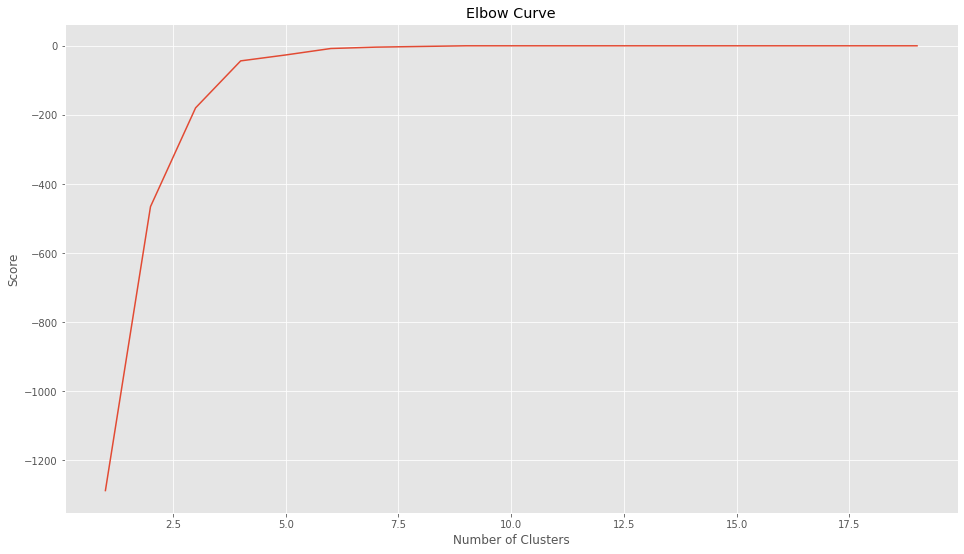

In [57]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=4).fit(X_train)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.22044605e-16 -1.11022302e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  3.03030303e-02  3.46944695e-18  3.46944695e-18
   3.46944695e-18  0.00000000e+00  3.46944695e-18  3.46944695e-18
   0.00000000e+00  3.63636364e-01  1.11022302e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.93421053e-01  7.77156117e-16  2.22044605e-16  3.33066907e-16
   3.33066907e-16 -3.33066907e-16 -6.93889390e-18 -6.93889390e-18
  -6.93889390e-18  0.00000000e+00 -6.93889390e-18 -6.93889390e-18
   1.00000000e+00  1.00000000e+00  9.93421053e-01  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00 -6.93889390e-18 -6.93889390e-18
  -6.93889390e-18  0.00000000e+00 -6.93889390e-18 -6.93889390e-18
   0.00000000e+00  3.88578059e-16  1.11022302e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.85507246e-01  1.00000000e+00  9.78260870e-01  2.77555756e-16
   2.77555756e-16  1.44927536e-02  2.

<ipython-input-59-5ee3b4c8cb58>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


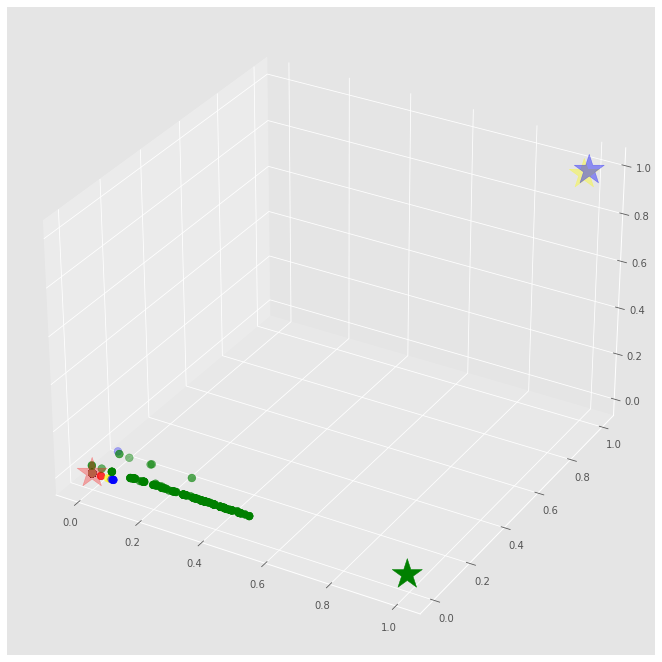

In [59]:
# Predicting the clusters
labels = kmeans.predict(X_train)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [60]:
from collections import Counter

In [61]:
Counter(labels)

Counter({0: 66, 3: 138, 2: 150, 1: 152})

In [62]:
X_train_categories = X_train.join(doc_labels[["Target"]])

In [63]:
X_train_categories.head()

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Target
Nombre documento,,,,,,,,,,,,,,,,,,,
2020-4330-2019-PAS-TR1-MAI.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Otros
2020-12969-50834-FQ-TR1-MAI.txt,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aceites
2020-4330-49958-FQ-TR1-MAI.txt,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Aceites
12914-50286-FQ.txt,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Aceites
13353-47649-ATR3 FASE N°1 CDBC FQ.txt,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aceites


In [64]:
resultados =  pd.DataFrame()
resultados['usuario']=X_train_categories.index
resultados['categoria']=X_train_categories['Target'].values
resultados['label'] = labels

In [65]:
pd.crosstab(resultados["categoria"], resultados["label"], margins=True)

label,0,1,2,3,All
categoria,,,,,
Aceites,0,0,150,135,285
Furanos,0,0,0,3,3
Gases,0,152,0,0,152
Otros,66,0,0,0,66
All,66,152,150,138,506


In [66]:
docs_tag = pd.read_csv("Target - tagging.csv", sep=",")

In [67]:
docs_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document     507 non-null    object
 1   real target  507 non-null    object
 2   provider     507 non-null    object
dtypes: object(3)
memory usage: 12.0+ KB


In [68]:
docs_tag.set_index("document", inplace=True)
docs_tag

,real target,provider
document,,
01-2020 - 12914-48590-BCO- RESERVA FQ.txt,Aceites,Jorpa
01-2020 - 12914-62511-BCO- RESERVA CR.txt,Gases,Jorpa
01-2020 - 13242-48578-BCO-ATR1 FASE N°1 FQ.txt,Aceites,Jorpa
01-2020 - 13242-62505-BCO-ATR1 FASE N°1 CR.txt,Gases,Jorpa
01-2020 - 13242-62505-BCO-ATR1 FASE N°1 CR(1).txt,Gases,Jorpa
...,...,...
TR2-Agrupado 1.txt,Otros,Otros
TR2-Agrupado 2.txt,Otros,Otros
TR2_Pruebas Parte 1.txt,Otros,Otros


In [69]:
tag_original.set_index("document", inplace=True)
y = tag_original.join(docs_tag)

y.fillna("Otros", inplace=True)

In [49]:
#y.fillna("Otros", inplace=True)

In [70]:
y.isnull().sum()

tag            0
real target    0
provider       0
dtype: int64

In [71]:
#y.drop(["tag", "provider"], axis=1, inplace=True)
y = y["real target"].values

In [72]:
y

array(['Otros', 'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Aceites',
       'Gases', 'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Aceites',
       'Gases/Aceites', 'Aceites', 'Aceites', 'Aceites', 'Gases',
       'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Gases', 'Gases',
       'Gases', 'Gases', 'Gases', 'Gases', 'Gases', 'Gases', 'Aceites',
       'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Furanos', 'Gases',
       'Aceites', 'Gases', 'Aceites', 'Gases', 'Aceites', 'Aceites',
       'Aceites', 'Otros', 'Aceites', 'Furanos', 'Aceites', 'Aceites',
       'Aceites', 'Aceites', 'Aceites', 'Gases', 'Gases', 'Gases',
       'Aceites', 'Aceites', 'Gases/Aceites', 'Aceites', 'Aceites',
       'Gases', 'Otros', 'Gases', 'Aceites', 'Gases', 'Otros', 'Aceites',
       'Aceites', 'Aceites', 'Gases', 'Aceites', 'Gases', 'Aceites',
       'Otros', 'Aceites', 'Aceites', 'Gases', 'Aceites', 'Aceites',
       'Aceites', 'Aceites', 'Aceites', 'Gases', 'Aceites', 'Aceites',
       'Aceites', 'Ace

In [73]:
# TODO: realizar diferentes particiones, tentativamente 60-40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# TODO: Hacer naive bayes y svm - grafica de comparacion rendimiento - voting
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [75]:
y_pred = classifier.predict(X_test)
y_pred

array(['Aceites', 'Gases', 'Aceites', 'Aceites', 'Aceites', 'Aceites',
       'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Gases',
       'Gases/Aceites', 'Otros', 'Gases', 'Aceites', 'Gases', 'Aceites',
       'Gases', 'Gases', 'Gases/Aceites', 'Aceites', 'Aceites', 'Aceites',
       'Furanos', 'Otros', 'Gases', 'Gases/Aceites', 'Gases', 'Aceites',
       'Gases', 'Gases', 'Aceites', 'Gases', 'Aceites', 'Gases', 'Gases',
       'Aceites', 'Aceites', 'Gases', 'Aceites', 'Aceites', 'Gases',
       'Gases', 'Gases', 'Aceites', 'Aceites', 'Gases', 'Aceites',
       'Gases/Aceites', 'Gases', 'Gases/Aceites', 'Otros', 'Aceites',
       'Aceites', 'Gases/Aceites', 'Gases/Aceites', 'Gases', 'Gases',
       'Gases/Aceites', 'Aceites', 'Aceites', 'Gases/Aceites', 'Aceites',
       'Aceites', 'Aceites', 'Gases', 'Aceites', 'Aceites', 'Aceites',
       'Aceites', 'Gases', 'Aceites', 'Gases/Aceites', 'Gases', 'Aceites',
       'Gases/Aceites', 'Otros', 'Aceites', 'Aceites', 'Aceites', '

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[51  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 12  0]
 [ 0  0  3  2  8]]
               precision    recall  f1-score   support

      Aceites       1.00      1.00      1.00        51
      Furanos       1.00      1.00      1.00         1
        Gases       0.89      1.00      0.94        25
Gases/Aceites       0.86      1.00      0.92        12
        Otros       1.00      0.62      0.76        13

     accuracy                           0.95       102
    macro avg       0.95      0.92      0.93       102
 weighted avg       0.96      0.95      0.95       102

0.9509803921568627


In [57]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

In [58]:
# TODO: realizar pruebas con pytesseract - avanzar en el documento - organizar approachs
# TODO: teoria NLP y modelos


## Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

In [78]:
predictions

array(['Aceites', 'Gases', 'Aceites', 'Aceites', 'Aceites', 'Aceites',
       'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Aceites', 'Gases',
       'Gases/Aceites', 'Otros', 'Gases', 'Aceites', 'Gases', 'Aceites',
       'Gases', 'Gases', 'Gases/Aceites', 'Aceites', 'Aceites', 'Aceites',
       'Otros', 'Aceites', 'Gases', 'Gases/Aceites', 'Gases', 'Aceites',
       'Gases', 'Gases', 'Aceites', 'Gases', 'Aceites', 'Gases', 'Gases',
       'Aceites', 'Aceites', 'Gases', 'Aceites', 'Aceites', 'Gases',
       'Gases', 'Gases', 'Aceites', 'Aceites', 'Gases', 'Aceites',
       'Gases/Aceites', 'Gases', 'Gases/Aceites', 'Otros', 'Aceites',
       'Aceites', 'Gases/Aceites', 'Gases/Aceites', 'Gases', 'Gases',
       'Gases/Aceites', 'Aceites', 'Aceites', 'Gases/Aceites', 'Aceites',
       'Aceites', 'Aceites', 'Gases', 'Aceites', 'Aceites', 'Aceites',
       'Aceites', 'Gases', 'Aceites', 'Gases/Aceites', 'Gases', 'Aceites',
       'Gases/Aceites', 'Otros', 'Aceites', 'Aceites', 'Aceites', '

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy score: ", accuracy_score(y_test, predictions))

#TODO: probar tecnicas de balanceo de datos, poner recall


Accuracy score:  0.9313725490196079


## SVM

In [80]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [81]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [82]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [83]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  94.12
F1 (Polynomial Kernel):  93.62


In [84]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  81.37
F1 (RBF Kernel):  75.26


## Voting

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



# defino los estimadores para el ensamble VOTO (VotingClassifier)
estimators = []
estimators.append(('LOG', LogisticRegression(random_state=123)))
estimators.append(('NB', MultinomialNB()))
estimators.append(('SVM', svm.SVC(random_state=123)))
estimators.append(('RF', RandomForestClassifier(min_samples_leaf= 10, class_weight="balanced",random_state = 123, criterion="gini", max_depth=6, max_features=5, n_estimators=150)))
estimators.append(('GB', GradientBoostingClassifier(random_state=123,learning_rate= 0.3, max_depth=3, n_estimators= 500)))


In [87]:
#Defino los modelos que voy a comparar incluido el VOTO
def get_models():
  models = dict()
  models['LOG']= LogisticRegression(multi_class="multinomial", random_state=123)
  models['NB'] = MultinomialNB()
  models['SVM'] = svm.SVC(random_state=123, kernel='rbf', gamma=0.5, C=0.1)
  models['RF'] = RandomForestClassifier(min_samples_leaf= 10,random_state = 123, criterion="entropy", max_depth=6, max_features=5, n_estimators=150)
  models['GB']= GradientBoostingClassifier(random_state=123,learning_rate= 0.3, max_depth=3, n_estimators= 500)
  models['Voto']=VotingClassifier(estimators, voting='hard')
  return models

In [88]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold


def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=123)
	scores = cross_validate(model, X, y, scoring='f1_weighted', cv=cv, error_score="raise")
	test_scores = scores['test_score']
	return test_scores

In [89]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>LOG 0.966 (0.014)
>NB 0.964 (0.006)
>SVM 0.823 (0.004)
>RF 0.875 (0.028)
>GB 0.981 (0.006)
>Voto 0.974 (0.010)


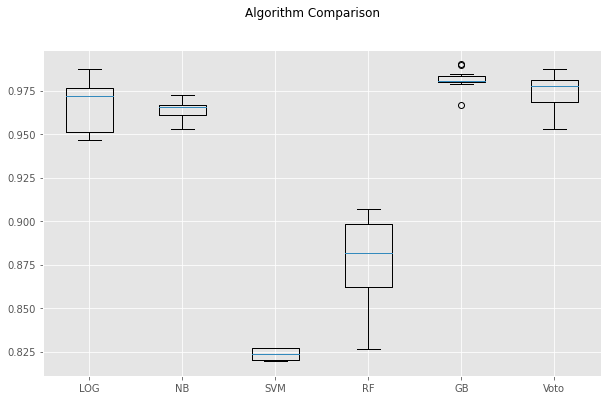

In [90]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Oversampling

### random forest

In [91]:
from imblearn.over_sampling import RandomOverSampler

In [92]:
oversampling =  RandomOverSampler(random_state=0)

X_train_res, y_train_res = oversampling.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))
 

Distribution before resampling Counter({'Aceites': 233, 'Gases': 122, 'Otros': 30, 'Gases/Aceites': 17, 'Furanos': 2})
Distribution labels after resampling Counter({'Aceites': 233, 'Gases': 233, 'Gases/Aceites': 233, 'Otros': 233, 'Furanos': 233})


In [93]:
classifier_oversampling = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_oversampling.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [94]:
y_pred_over_rf = classifier_oversampling.predict(X_test)

In [95]:
print(confusion_matrix(y_test, y_pred_over_rf))
print(classification_report(y_test,y_pred_over_rf))
print(accuracy_score(y_test, y_pred_over_rf))

[[51  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 12  0]
 [ 0  0  3  2  8]]
               precision    recall  f1-score   support

      Aceites       1.00      1.00      1.00        51
      Furanos       1.00      1.00      1.00         1
        Gases       0.89      1.00      0.94        25
Gases/Aceites       0.86      1.00      0.92        12
        Otros       1.00      0.62      0.76        13

     accuracy                           0.95       102
    macro avg       0.95      0.92      0.93       102
 weighted avg       0.96      0.95      0.95       102

0.9509803921568627


In [96]:
naive_bayes_oversampling = MultinomialNB()
naive_bayes_oversampling.fit(X_train_res, y_train_res)
predictions_oversampling_nb = naive_bayes_oversampling.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy score: ", accuracy_score(y_test, predictions_oversampling_nb))


Accuracy score:  0.9509803921568627


In [98]:
rbf_oversampling = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_res, y_train_res)
poly_oversampling = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train_res, y_train_res)

In [99]:
poly_pred_oversampling = poly_oversampling.predict(X_test)
rbf_pred_oversampling = rbf_oversampling.predict(X_test)

In [100]:
poly_accuracy = accuracy_score(y_test, poly_pred_oversampling)
poly_f1 = f1_score(y_test, poly_pred_oversampling, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  94.12
F1 (Polynomial Kernel):  93.62


In [101]:
rbf_accuracy = accuracy_score(y_test, rbf_pred_oversampling)
rbf_f1 = f1_score(y_test, rbf_pred_oversampling, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  95.10
F1 (RBF Kernel):  94.67


In [102]:
def evaluate_model_oversampling(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=123)
	scores = cross_validate(model, X, y, scoring='f1_weighted', cv=cv, error_score="raise")
	test_scores = scores['test_score']
	return test_scores

In [103]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_oversampling, names = list(), list()
for name, model in models.items():
	scores = evaluate_model_oversampling(model, X_train_res, y_train_res)
	results_oversampling.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>LOG 0.980 (0.005)
>NB 0.980 (0.005)
>SVM 0.980 (0.005)
>RF 0.961 (0.016)
>GB 0.998 (0.001)
>Voto 0.980 (0.005)


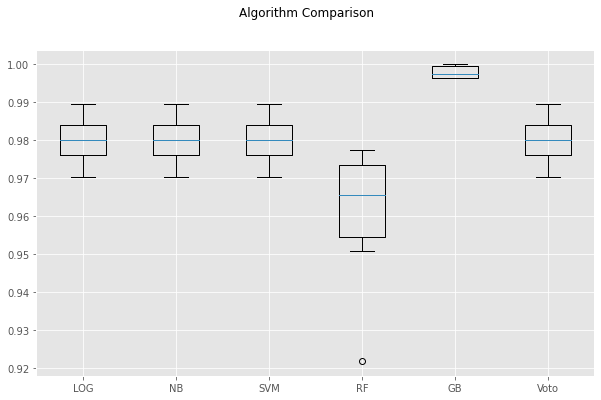

In [104]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_oversampling)
ax.set_xticklabels(names)
plt.show()

In [125]:
model_gb_oversampling = GradientBoostingClassifier(random_state=123,learning_rate= 0.3, max_depth=3, n_estimators= 500)
model_gb_oversampling.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=500,
                           random_state=123)

In [126]:
y_pred_gb_oversampling = model_gb_oversampling.predict(X = X_test)

In [127]:
print("Accuracy {} %".format(100*accuracy_score(y_pred_gb_oversampling, y_test)))

Accuracy 95.09803921568627 %


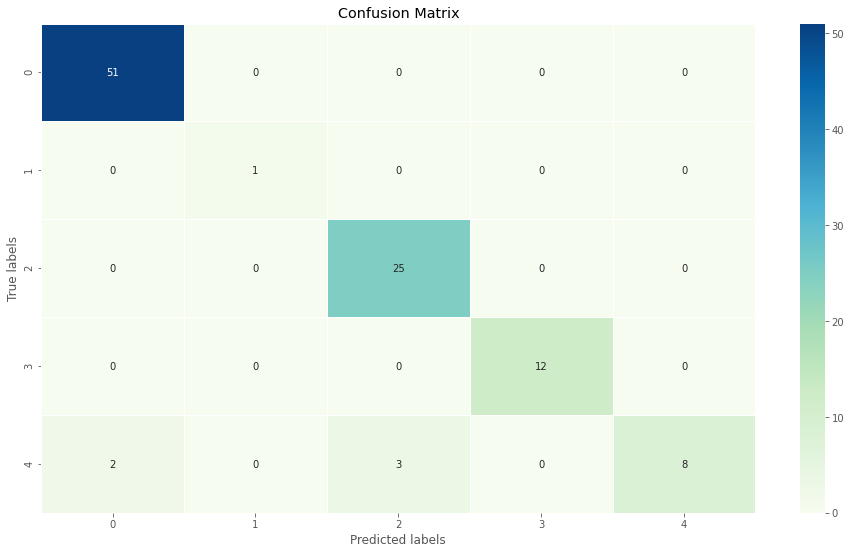

<Figure size 1152x1152 with 0 Axes>

In [128]:
import seaborn as sns

# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred_gb_oversampling)

ax= plt.subplot()
sns.heatmap(cm, ax=ax, annot=True, cmap="GnBu", fmt='.5g', linewidths=.5);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.figure(figsize=(16, 16));

In [129]:
print(classification_report(y_test, y_pred_gb_oversampling))

               precision    recall  f1-score   support

      Aceites       0.96      1.00      0.98        51
      Furanos       1.00      1.00      1.00         1
        Gases       0.89      1.00      0.94        25
Gases/Aceites       1.00      1.00      1.00        12
        Otros       1.00      0.62      0.76        13

     accuracy                           0.95       102
    macro avg       0.97      0.92      0.94       102
 weighted avg       0.95      0.95      0.95       102



### Tunning hyperparameters

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing


In [110]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500],
              'max_features'  : [ 'auto', 'sqrt'],
              'max_depth'     : [ 3, 5, 10],
              'learning_rate' : [0.01, 0.1, 0.3]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'f1',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=2, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

%time grid.fit(X = X_train_res, y =  y_train_res)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/Users/lorozcoceron/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  clone(base_estimator).set_params(**self.best_params_)
/Users/lorozcoceron/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  clone(base_estimator).set_params(**self.best_params_)


CPU times: user 6.56 s, sys: 210 ms, total: 6.77 s
Wall time: 10min 18s


,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.01,3,auto,50,NaN,NaN,NaN,NaN
1,0.01,3,auto,100,NaN,NaN,NaN,NaN
2,0.01,3,auto,500,NaN,NaN,NaN,NaN
3,0.01,3,sqrt,50,NaN,NaN,NaN,NaN


In [111]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50} : nan f1


In [115]:
modelo_final_gb = grid.best_estimator_

In [117]:
y_pred_gb = modelo_final_gb.predict(X = X_test)

In [118]:
print("Accuracy {} %".format(100*accuracy_score(y_pred_gb, y_test)))

Accuracy 92.15686274509804 %


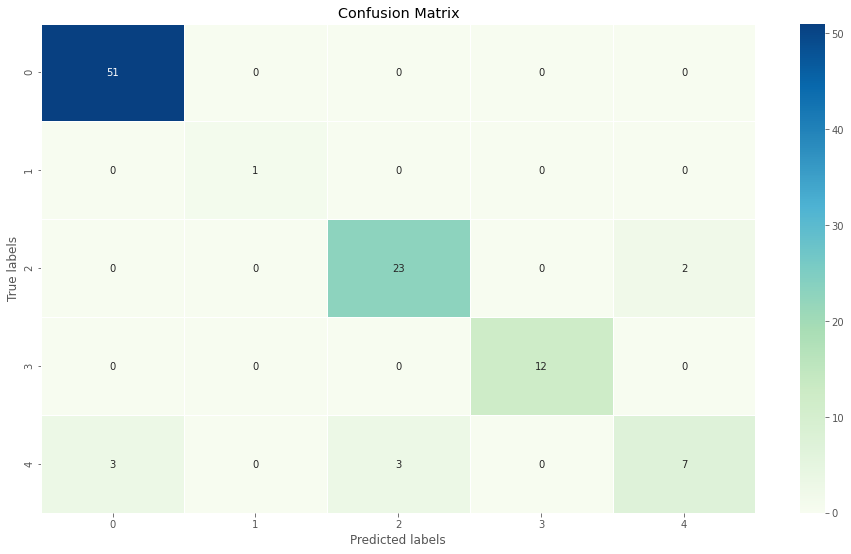

<Figure size 1152x1152 with 0 Axes>

In [122]:
import seaborn as sns

# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred_gb)

ax= plt.subplot()
sns.heatmap(cm, ax=ax, annot=True, cmap="GnBu", fmt='.5g', linewidths=.5);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.figure(figsize=(16, 16));

In [121]:
print(classification_report(y_test, y_pred_gb))

               precision    recall  f1-score   support

      Aceites       0.94      1.00      0.97        51
      Furanos       1.00      1.00      1.00         1
        Gases       0.88      0.92      0.90        25
Gases/Aceites       1.00      1.00      1.00        12
        Otros       0.78      0.54      0.64        13

     accuracy                           0.92       102
    macro avg       0.92      0.89      0.90       102
 weighted avg       0.92      0.92      0.92       102

